<a href="https://colab.research.google.com/github/AlphaKermit-999/AI-Topics-learnings/blob/main/Advanced_AI/Assignement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
# importing necessary pandas and numpy libraries for data manipulationa nd numerical operations

import pandas as pd
import numpy as np

In [423]:
# Load the dataset
df = pd.read_csv('loan_data.csv')

In [424]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [425]:
df1 = pd.read_excel('loan_data.xlsx')
diff_df = df.equals(df1)
print(diff_df)

True


Tested that load_data.csv and loan_data.xlsx are exactly same data set, so continuing with load_data.csv i.e. stored within dataframe "df" as the dataset for our EDA.

Initial data inspection

In [426]:
# fetching the information regarding all the columns in thsi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [427]:
# Fetching the statsistical summary of the numerical columns
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

To understand the reasons and relationship with loan default status (here the column not.fully.paid denotes it), we will explore all possible relevant columns.

/tmp/ipython-input-2021468339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='not.fully.paid', data=df, palette='viridis')


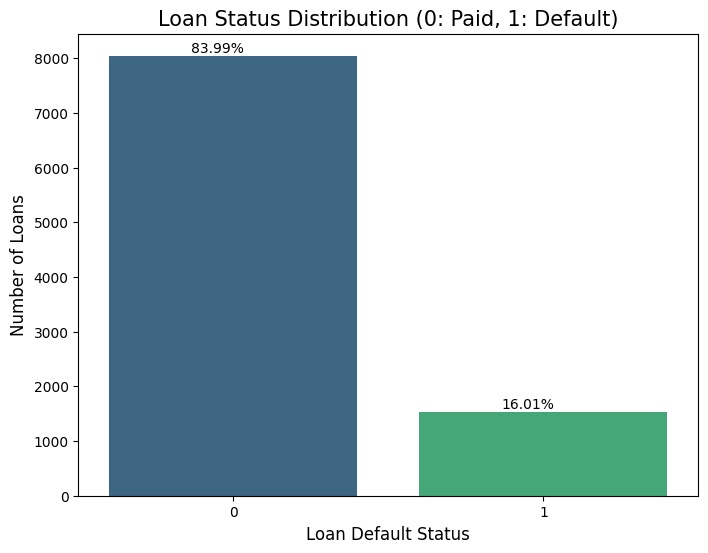

In [429]:
# Starting with not.fully.paid to understand the imbalance
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='not.fully.paid', data=df, palette='viridis')
plt.title('Loan Status Distribution (0: Paid, 1: Default)', fontsize=15)
plt.xlabel('Loan Default Status', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)

# Represent in percentages
total = len(df['not.fully.paid'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

Through this we can understand the dataset is highly imbalanced. Approximately 16% of loans are in a default state.

Starting her we will systematically analyze every feature in dataset.

not.fully.paid         0         1
credit.policy                     
0               0.722163  0.277837
1               0.868482  0.131518


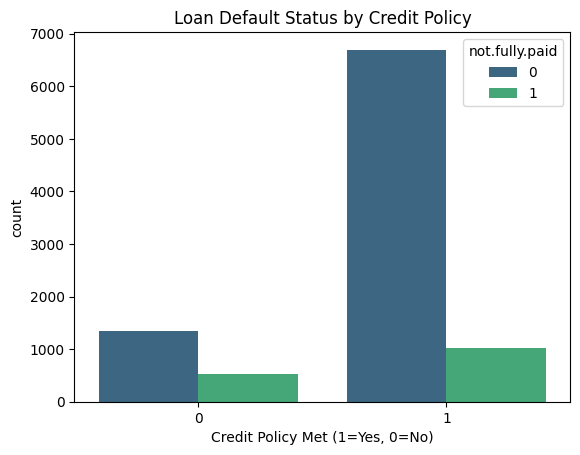

In [430]:
# Analyzing the credit.policy against not.fully.paid
print(pd.crosstab(df['credit.policy'], df['not.fully.paid'], normalize='index'))
sns.countplot(x='credit.policy', data=df, hue='not.fully.paid', palette='viridis')
plt.title('Loan Default Status by Credit Policy')
plt.xlabel('Credit Policy Met (1=Yes, 0=No)')
plt.show()

A much higher proportion of borrowers who did not meet the credit criteria ended up defaulting. This indicates that credit.policy feature is a strong indicator of risk.

In [431]:
df["purpose"].value_counts()

,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


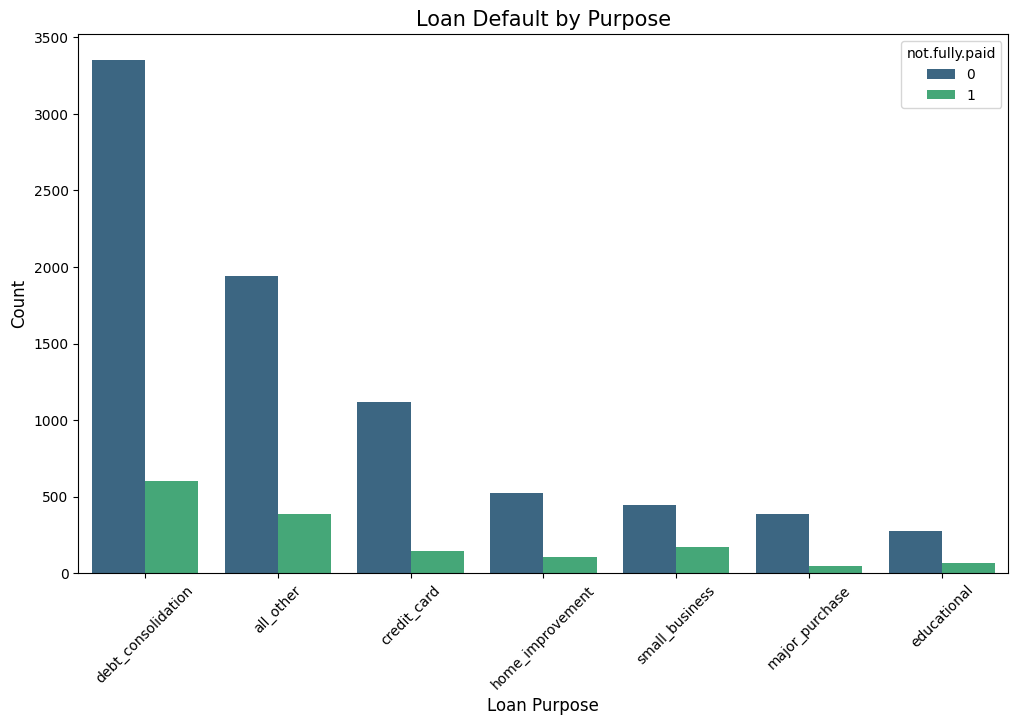

In [432]:
# Analyzing the purpose against not.fully.paid
plt.figure(figsize=(12, 7))
sns.countplot(x='purpose', data=df, hue='not.fully.paid', palette='viridis', order=df['purpose'].value_counts().index)
plt.title('Loan Default by Purpose', fontsize=15)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

While "debt consolidation" is the most common purpose, "small_business" loans appear to have a proportionally higher rate of defaults compared to other categories.

In [433]:
df[df['not.fully.paid'] == 1]['fico'].value_counts()

,count
fico,
667,102
687,99
662,93
697,93
682,91
702,87
677,83
672,82
692,80


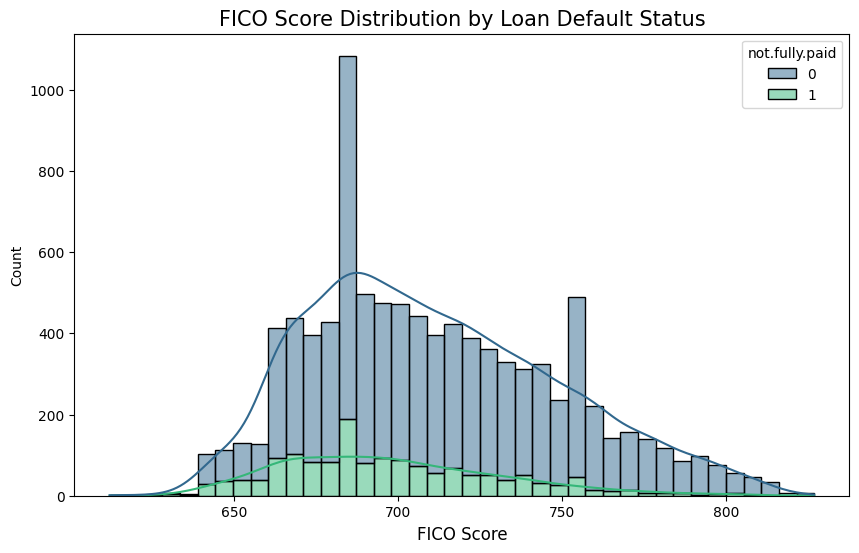

In [434]:
# Analyzing the fico against not.fully.paid
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fico', hue='not.fully.paid', multiple='stack', bins=40, palette='viridis', kde=True)
plt.title('FICO Score Distribution by Loan Default Status', fontsize=15)
plt.xlabel('FICO Score', fontsize=12)
plt.show()

There is a clear trend: borrowers with lower FICO scores (especially around 680) are significantly more likely to default.

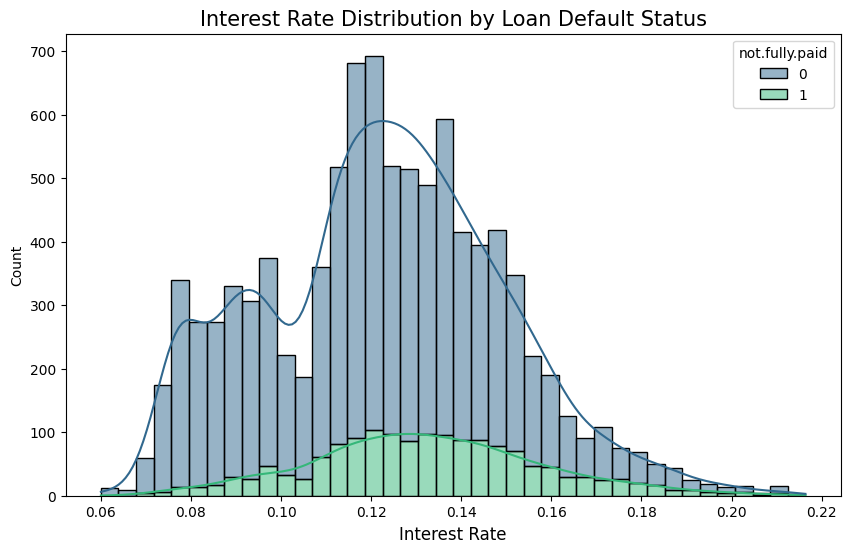

In [435]:
# Analyzing the int.rate against not.fully.paid
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='int.rate', hue='not.fully.paid', multiple='stack', bins=40, palette='viridis', kde=True)
plt.title('Interest Rate Distribution by Loan Default Status', fontsize=15)
plt.xlabel('Interest Rate', fontsize=12)
plt.show()

The defaulted loans are concentrated in the higher interest rate buckets (12% - 14%), which makes sense as riskier borrowers are assigned higher rates.

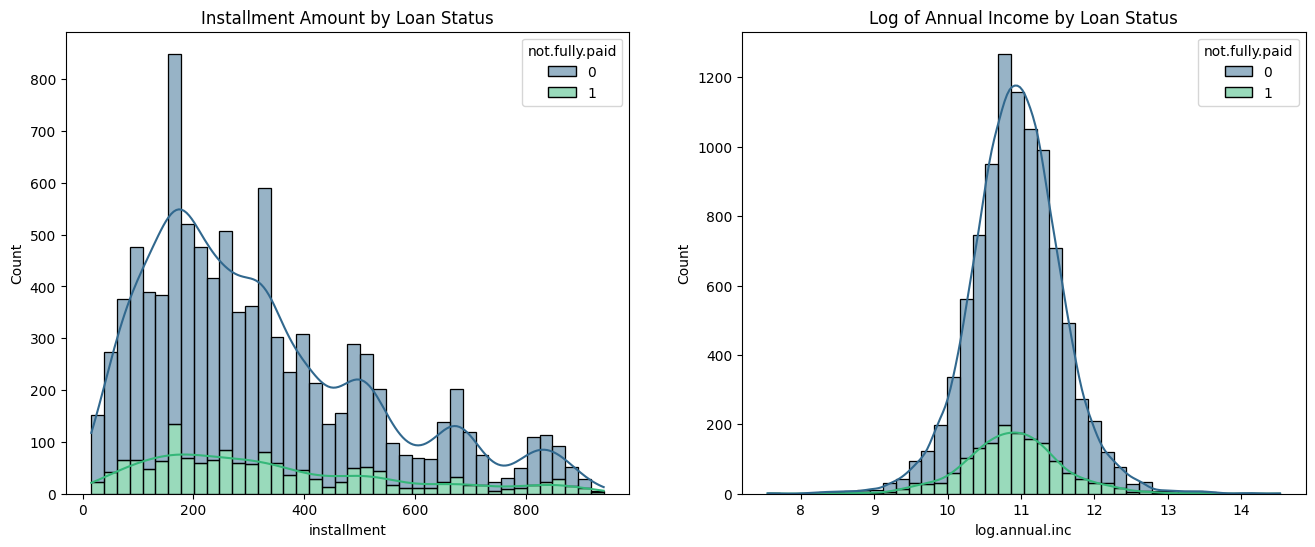

In [436]:
# Analyzing the installment and log.annual.inc against not.fully.paid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=df, x='installment', hue='not.fully.paid', multiple='stack', ax=axes[0], palette='viridis', bins=40, kde=True)
axes[0].set_title('Installment Amount by Loan Status')
sns.histplot(data=df, x='log.annual.inc', hue='not.fully.paid', multiple='stack', ax=axes[1], palette='viridis', bins=40, kde=True)
axes[1].set_title('Log of Annual Income by Loan Status')
plt.show()

The distributions for installment are fairly similar, but defaulted loans are slightly more common among borrowers with log.annual.inc ranging around 11.

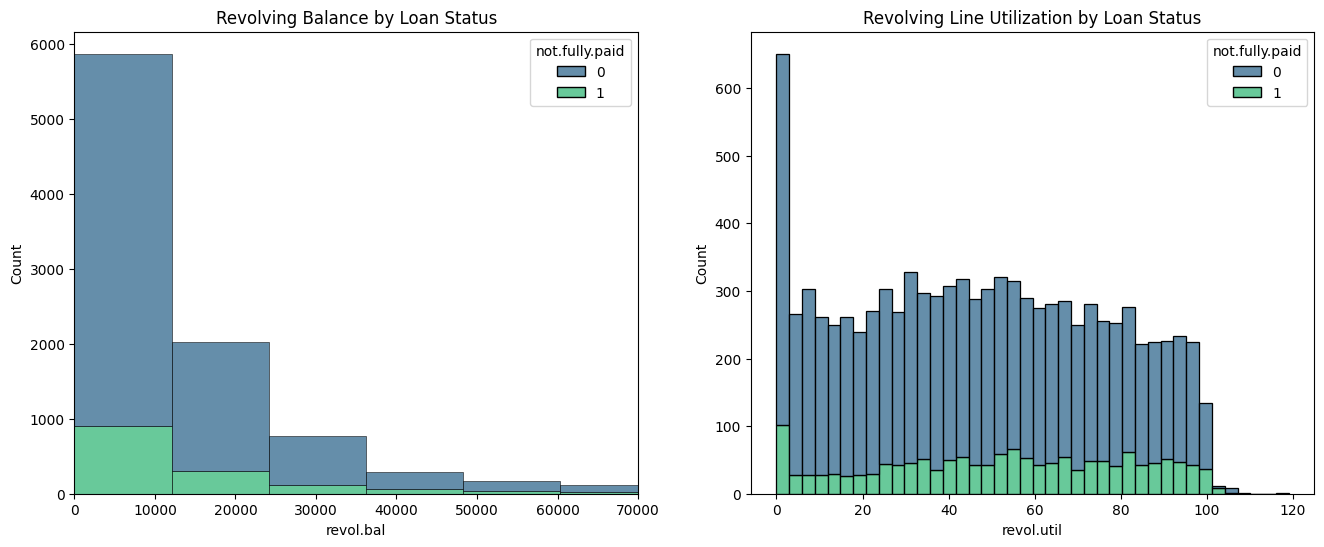

In [437]:
# Analyzing the revol.bal and revol.util against not.fully.paid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=df, x='revol.bal', hue='not.fully.paid', multiple='stack', ax=axes[0], palette='viridis', bins=100)
axes[0].set_title('Revolving Balance by Loan Status')
axes[0].set_xlim(0, 70000) # Limiting x-axis for better readability
sns.histplot(data=df, x='revol.util', hue='not.fully.paid', multiple='stack', ax=axes[1], palette='viridis', bins=40)
axes[1].set_title('Revolving Line Utilization by Loan Status')
plt.show()

Borrowers with higher revolving line utilization (revol.util) appear to default more often, indicating they may be over-utilisation on their credit.

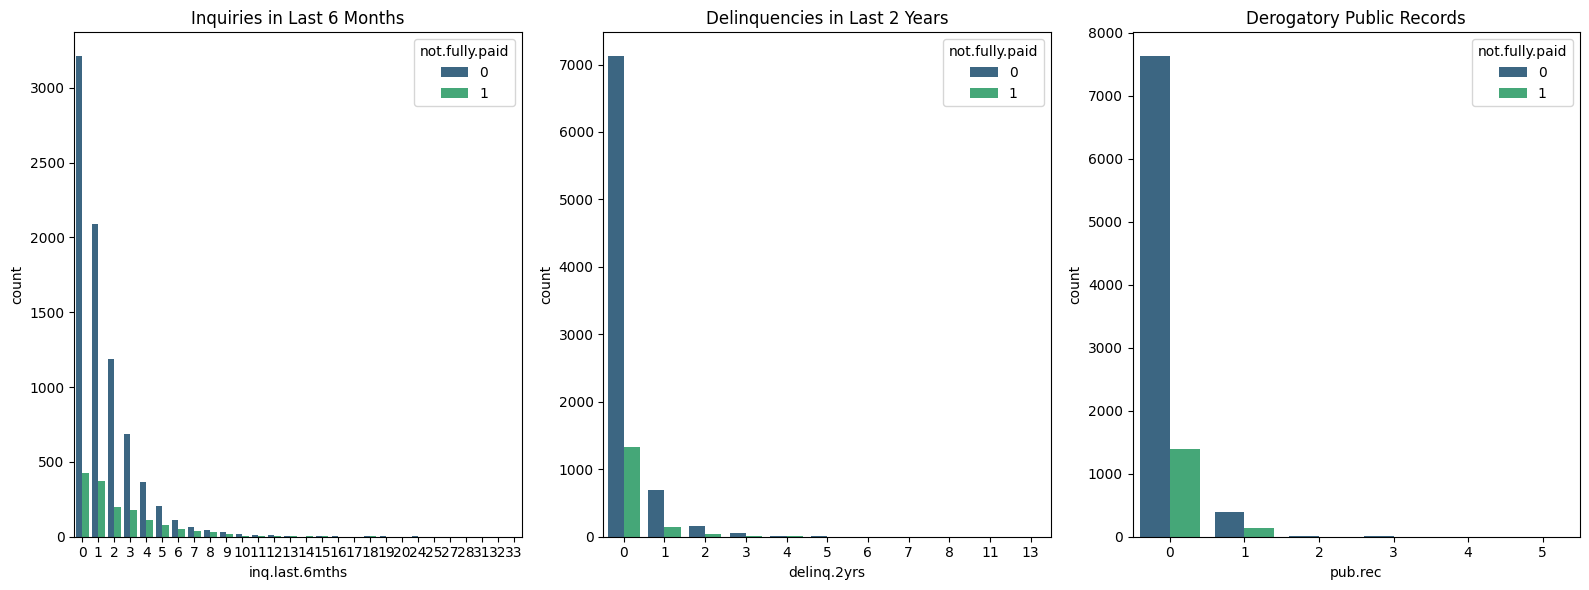

In [438]:
# Analyzing the inq.last.6mnths, delinq.2yrs and pub.rec against not.fully.paid
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
sns.countplot(x='inq.last.6mths', data=df, hue='not.fully.paid', ax=axes[0], palette='viridis')
axes[0].set_title('Inquiries in Last 6 Months')
sns.countplot(x='delinq.2yrs', data=df, hue='not.fully.paid', ax=axes[1], palette='viridis')
axes[1].set_title('Delinquencies in Last 2 Years')
sns.countplot(x='pub.rec', data=df, hue='not.fully.paid', ax=axes[2], palette='viridis')
axes[2].set_title('Derogatory Public Records')
plt.tight_layout()
plt.show()

A higher number of inquiries in the last 6 months shows a stronger tendency to default. The same is true for having past delinquencies or public records. These are all clear indicators of higher risk.

Feature Transformations

From above observations the purpose column would be our only categorical feature as it of object type, we will use label encoding for this variable.

In [439]:
# Upon identifying the unique categories in the 'purpose' column, we have 7 unique categories. We will create a mapping from category name to an integer from 1 to 7
purpose_categories = df['purpose'].unique()
print("Original categories:", purpose_categories)
# We use a dictionary for a clear and explicit mapping
purpose_mapping = {category: i+1 for i, category in enumerate(purpose_categories)}
print("\nGenerated Mapping:", purpose_mapping)

Original categories: ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']

Generated Mapping: {'debt_consolidation': 1, 'credit_card': 2, 'all_other': 3, 'home_improvement': 4, 'small_business': 5, 'major_purchase': 6, 'educational': 7}


In [440]:
# Apply the mapping to the 'purpose' column
df['purpose'] = df['purpose'].map(purpose_mapping)

In [441]:
# Verify the transformation
print("First 5 rows after transforming 'purpose' column:")
display(df.head())

First 5 rows after transforming 'purpose' column:


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [442]:
print("Data type of 'purpose' column after mapping:", df['purpose'].dtype)

Data type of 'purpose' column after mapping: int64


Additional feature engineering

In [443]:
# Convert days with credit line to years
df['credit_history_yrs'] = df['days.with.cr.line'] / 365
df['credit_history_yrs'].head()

,credit_history_yrs
0,15.451941
1,7.561644
2,12.904110
3,7.397146
4,11.139726


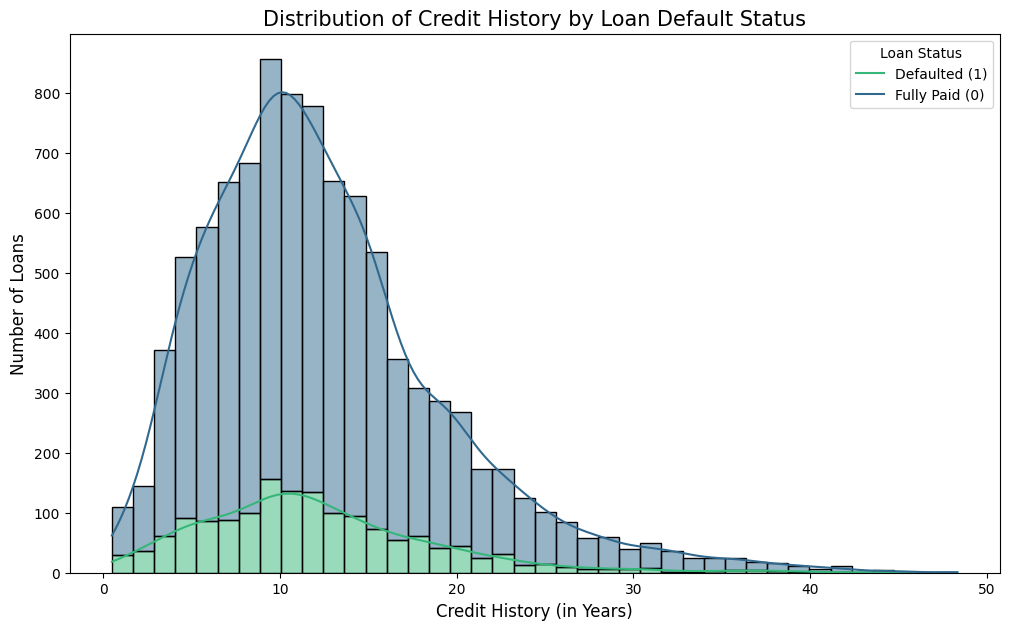

In [444]:
# Analyzing the days.with.cr.line against not.fully.paid
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x='credit_history_yrs', hue='not.fully.paid', multiple='stack',
             palette='viridis', bins=40, kde=True)
plt.title('Distribution of Credit History by Loan Default Status', fontsize=15)
plt.xlabel('Credit History (in Years)', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.legend(title='Loan Status', labels=['Defaulted (1)', 'Fully Paid (0)'])
plt.show()

This variable days.with.cr.line or which has been converted to credit_history_yrs doesn't seem to be enough valuable for loan defaulting as defaulters are quite spread across 0 to 20 years

In [445]:
# Revert log.annual.inc to annual income for ratio calculations.
df['annual_inc'] = np.exp(df['log.annual.inc'])
df['annual_inc'].head()

,annual_inc
0,85000.000385
1,65000.000073
2,31999.999943
3,85000.000385
4,80799.999636


In [446]:
# Create an installment-to-income ratio (Debt-to-Income from this loan). Installment to income ratio can be a better variable for correlation derived from installment and the individuals annual income.
df['installment_income_ratio'] = (df['installment'] * 12) / df['annual_inc']
df['installment_income_ratio'].head()

,installment_income_ratio
0,0.117049
1,0.042133
2,0.137573
3,0.022919
4,0.015285


In [447]:
# Binary flag for any derogatory marks (delinquencies or public records)
df['has_derog_marks'] = ((df['delinq.2yrs'] > 0) | (df['pub.rec'] > 0)).astype(int)
df['has_derog_marks']

,has_derog_marks
0,0
1,0
2,0
3,0
4,1
...,...
9573,0
9574,0
9575,0
9576,0


In [448]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_history_yrs,annual_inc,installment_income_ratio,has_derog_marks
0,1,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,15.451941,85000.000385,0.117049,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,7.561644,65000.000073,0.042133,0
2,1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,12.904110,31999.999943,0.137573,0
3,1,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,7.397146,85000.000385,0.022919,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,11.139726,80799.999636,0.015285,1


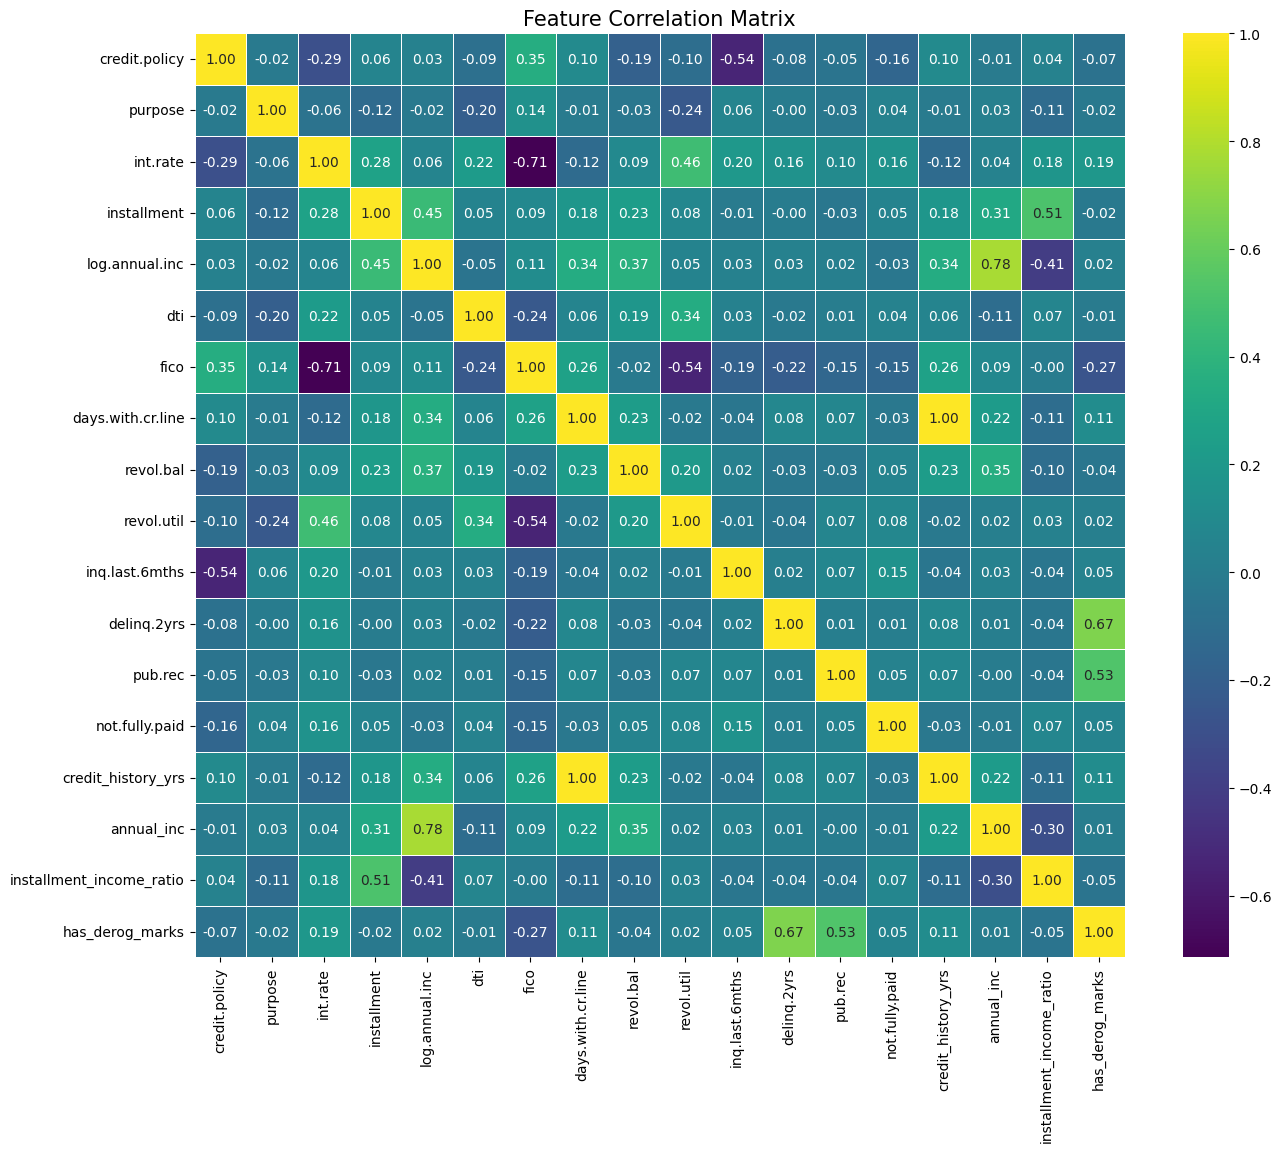

In [449]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=15)
plt.show()

Analysis from Heatmap -
1. Strongest Negative Correlation (FICO vs. Interest Rate):
The most significant relationship is between fico and int.rate with a correlation of -0.71.
Interpretation: This is a classic and expected relationship in lending. It means that as a borrower's FICO score increases (they are considered less risky), the interest rate they are offered decreases significantly. This confirms the data follows real-world lending logic.
2. Correlations from Feature Engineering:
has_derog_marks has a strong positive correlation with delinq.2yrs (0.67) and pub.rec (0.53).
Interpretation: This is an expected and validating result. The feature has_derog_marks was created directly from delinq.2yrs and pub.rec. This high correlation simply confirms that the new feature is correctly capturing the combined information of its source columns.
installment and installment_income_ratio have a correlation of 0.51. This is also expected, as the installment value is the numerator in the ratio you created.
3. Correlations with the Target Variable (not.fully.paid):
The features most correlated with loan default are int.rate (0.16), credit.policy (-0.16), fico (-0.15), and inq.last.6mths (0.15).
Interpretation: These values, while not extremely high, are the strongest linear indicators in the dataset. They suggest that defaults are more likely with higher interest rates, lower FICO scores, more recent credit inquiries, and for those who did not meet the initial credit policy.
4. Other Moderate Correlations:
revol.util (revolving line utilization) has a moderate negative correlation with fico (-0.54), meaning people with lower FICO scores tend to use more of their available credit.
int.rate has a moderate positive correlation with revol.util (0.46), which means borrowers using a high percentage of their available credit are often charged higher interest rates.

In [450]:
# Columns that can be dropped

columns_to_drop = [
    'days.with.cr.line',  # Replaced by 'credit_history_yrs'
    'log.annual.inc',     # Replaced by 'installment_income_ratio'
    'annual_inc',         # This was an intermediate column, no longer needed
    'delinq.2yrs',        # Combined into 'has_derog_marks'
    'pub.rec'             # Combined into 'has_derog_marks'
]

In [451]:
df_final = df.drop(columns=columns_to_drop)

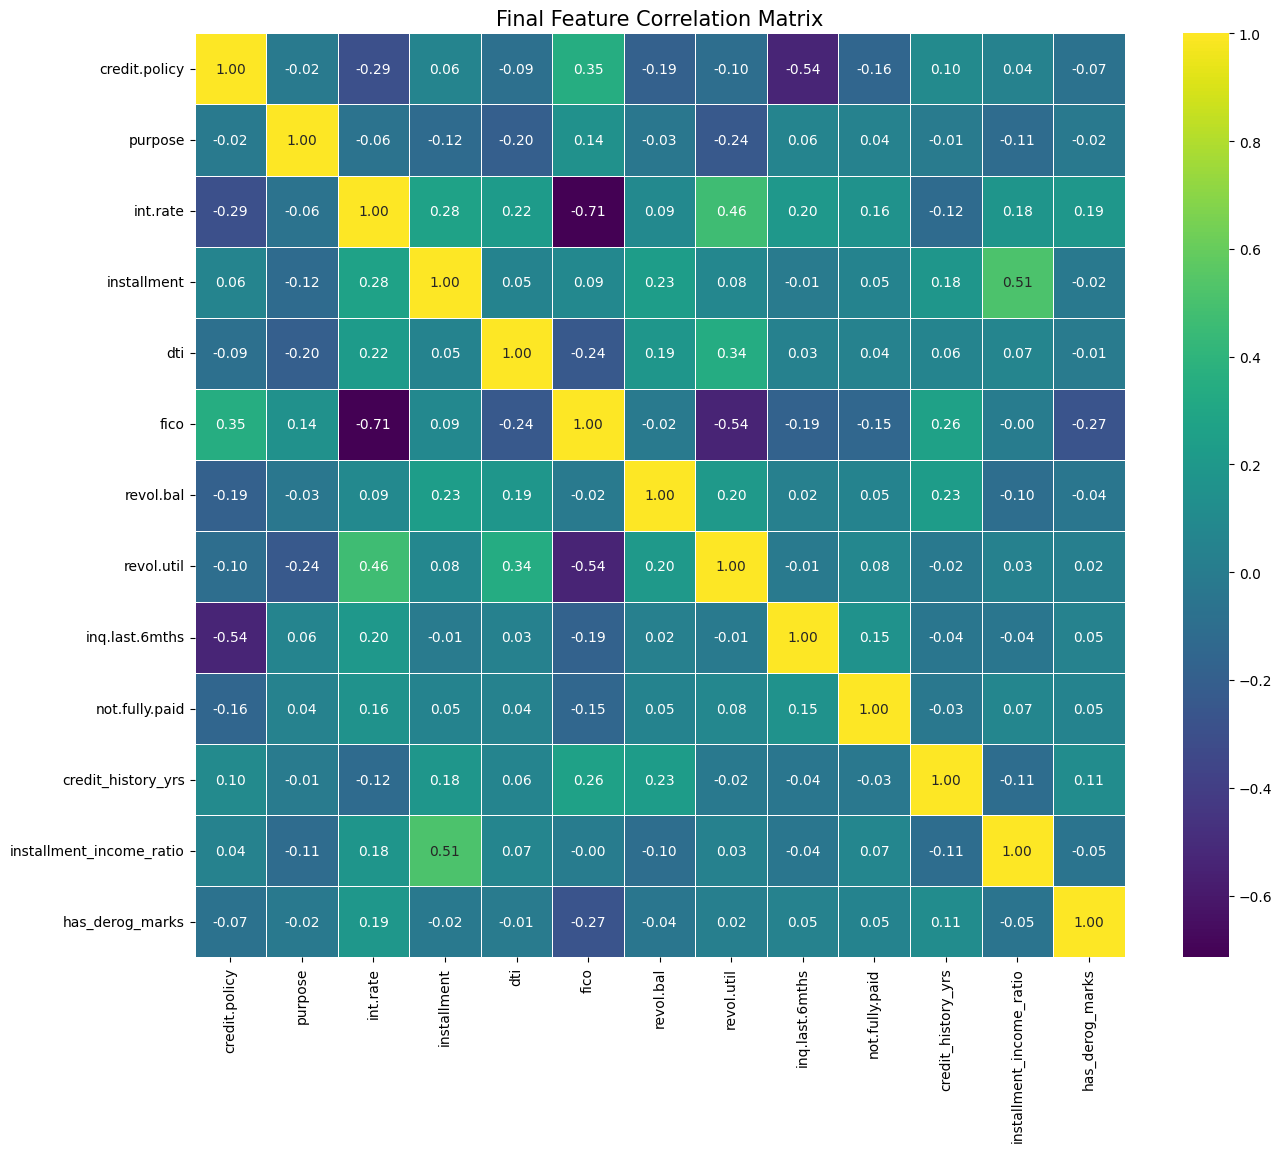

In [452]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_final.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Final Feature Correlation Matrix', fontsize=15)
plt.show()

Preparing data for the deep learning Model -

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [454]:
X = df_final.drop('not.fully.paid', axis=1)
y = df_final['not.fully.paid']

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101, stratify=y)

In [456]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [457]:
smote = SMOTE(random_state=101)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [458]:
X_train.shape

(6704, 12)

In [459]:
X_train_resampled.shape

(11262, 12)

In [460]:
y_train.value_counts()

,count
not.fully.paid,
0,5631
1,1073


In [461]:
y_train_resampled.value_counts()

,count
not.fully.paid,
0,5631
1,5631


In [462]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [464]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

None
